# XGBoost hyperparameter analysis

### Use Excel to clean the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
data=pd.read_csv('xgb_op_data.csv',sep=',')

In [3]:
data

,f1,std,learning_rate,n_estimators,subsample,max_depth
0,0.785267,0.007098,0.001000,100,1.000000,6
1,0.794152,0.006595,0.001000,500,1.000000,6
2,0.802310,0.004649,0.001000,1000,1.000000,6
3,0.802798,0.004451,0.010000,100,1.000000,6
4,0.838900,0.003961,0.010000,500,1.000000,6
5,0.858775,0.005624,0.010000,1000,1.000000,6
6,0.859518,0.006141,0.100000,100,1.000000,6
7,0.890296,0.005346,0.100000,500,1.000000,6
8,0.896131,0.006255,0.100000,1000,1.000000,6
9,0.883905,0.007594,0.100000,1000,0.500000,3


In [4]:
data1 = data.sort_values(by='f1')

In [5]:
data1 = data1.reset_index(drop=True)

In [6]:
data2=data1[7:]

In [7]:
data2

,f1,std,learning_rate,n_estimators,subsample,max_depth
7,0.785267,0.007098,0.001000,100,1.000000,6
8,0.794152,0.006595,0.001000,500,1.000000,6
9,0.802310,0.004649,0.001000,1000,1.000000,6
10,0.802798,0.004451,0.010000,100,1.000000,6
11,0.838900,0.003961,0.010000,500,1.000000,6
12,0.858775,0.005624,0.010000,1000,1.000000,6
13,0.859518,0.006141,0.100000,100,1.000000,6
14,0.862000,0.005816,0.704539,987,0.361126,6
15,0.867077,0.003266,0.972432,989,0.512742,6
16,0.874702,0.005307,0.822018,1025,0.568605,7


In [8]:
X1 = data2['learning_rate']
X2 = data2['subsample']
X3 = data2['n_estimators']
X4 = data2["max_depth"]
Y = data2['f1']

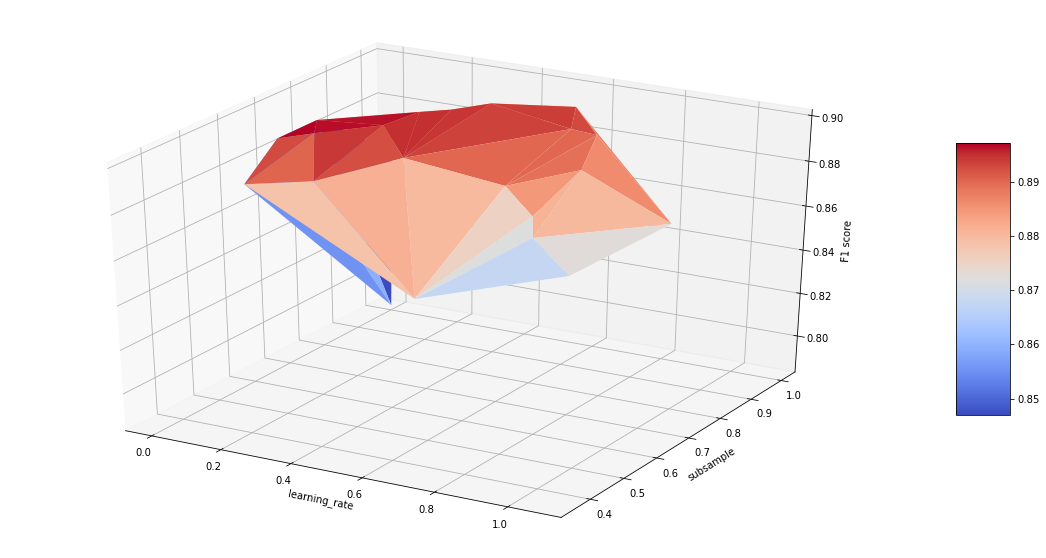

In [9]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf= ax.plot_trisurf(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('learning_rate')
ax.set_ylabel('subsample')
ax.set_zlabel('F1 score')
plt.show()

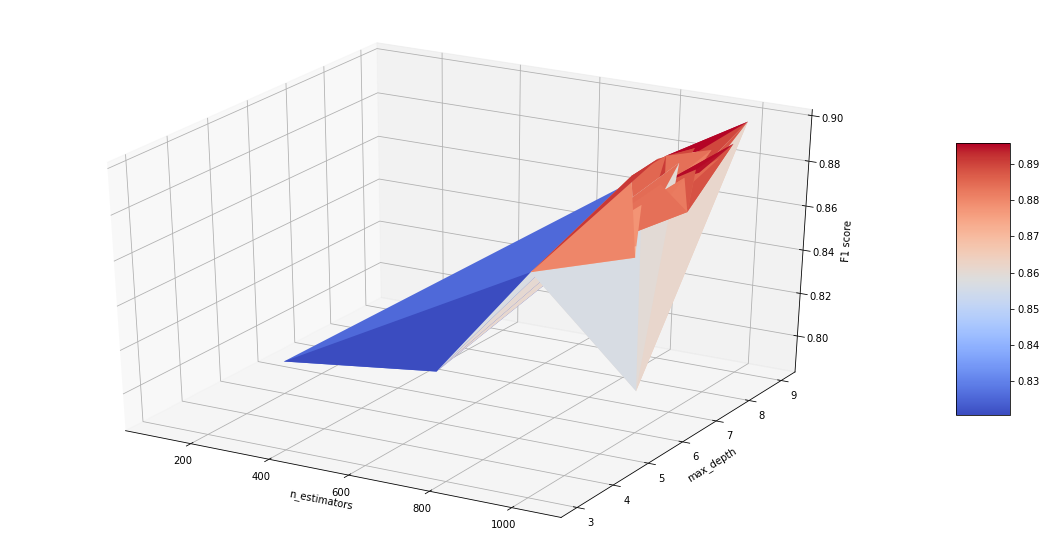

In [10]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf= ax.plot_trisurf(X3, X4, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('F1 score')
plt.show()

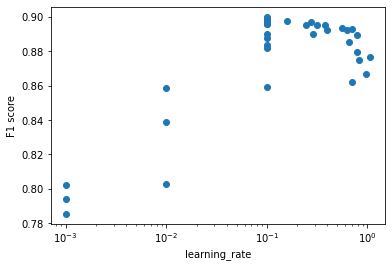

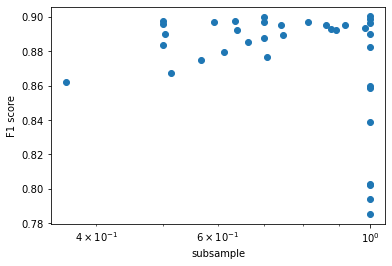

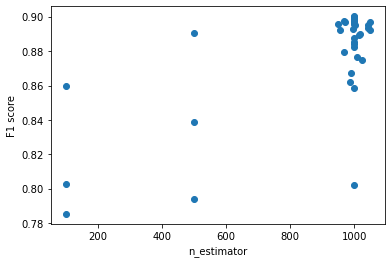

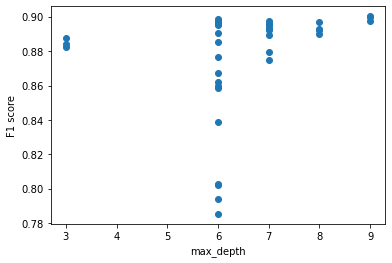

In [11]:
fig, ax = plt.subplots()
ax.scatter(X1, Y)
ax.set_xlabel('learning_rate')
ax.set_ylabel('F1 score')
plt.xscale('log')
plt.show()


fig, ax = plt.subplots()
ax.scatter(X2, Y)
ax.set_xlabel('subsample')
ax.set_ylabel('F1 score')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.scatter(X3, Y)
ax.set_xlabel('n_estimator')
ax.set_ylabel('F1 score')
plt.show()

fig, ax = plt.subplots()
ax.scatter(X4, Y)
ax.set_xlabel('max_depth')
ax.set_ylabel('F1 score')
plt.show()

It seems that the sweet spot is where
- learning rate 0.1
- subsample (0.5, 1)
- n_estimater 1000
- max_depth (6,9)

### Reference:
https://matplotlib.org/examples/mplot3d/trisurf3d_demo.html
